In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Formulate the problem as an integer programming (linear programming with binary
variables) problem. Argue it is a set cover problem.**

In [2]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

In [3]:
from pyomo.environ import *

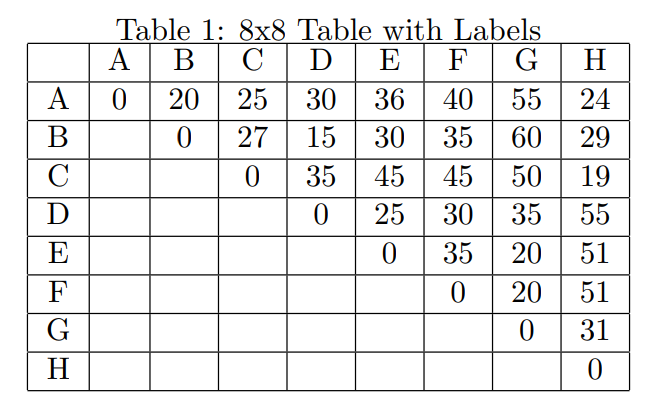

# Cities reachable under 25 minutes for each city:

$A : \{B, C, H\} \\
B : \{A, D\} \\
C : \{A, H\}\\
D : \{B, E\} \\
E : \{D, G\} \\
F : \{G\}\\
G : \{E, F,\} \\
H : \{A, C\}$

Let us represent a varible $x_{ij}$ as:
$x_{ij} \begin{cases} 1 & \text{if i is in neigbourhood of j} \\
0 & \text{otherwise} \end{cases}$

Then our integer program will become:

Objective: $$ \min \sum_{i=1}^{8}y_i $$
Such that : $$ \sum_{j = 1}^{8}x_{ij}y_j \geq 1 \ \ \ ∀ \ i = 1,2,...8$$

The objective is to choose as minimum cities as possible, such that for each city i is covered atleast once. This is ensured as, for each $y_j$ either $i$ itself is choosen or a neighbour of $i$, ( say, $j$ ) is choosen.

Let us take : $i =1$

$$
 x_{11}y_1 + x_{12}y_2 + x_{13}y_3 + x_{14}y_4 + x_{15}y_5+ x_{16}y_6 + x_{17}y_7 + x_{18}y_8  \geq 1
$$
$$
 y_1 + y_2 + y_3 + y_8  \geq 1
$$

This shows, that either 1 is selected or its neigbours 2, 3, 8 are chosen, which will cover the node 1.

In [ ]:
D =[[0 , 20, 25, 30, 36, 40, 55, 24],
[20, 0 , 27, 15, 30, 35, 60, 29],
[25, 27, 0 , 35, 45, 45, 50, 19],
[30, 15, 35, 0 , 25, 30, 35, 55],
[36, 30, 45, 25, 0 , 35, 20, 51],
[40, 35, 45, 30, 35, 0 , 20, 51],
[55, 60, 50, 35, 20, 20, 0 , 31],
[24, 29, 19, 55, 51, 51, 31, 0]]

In [8]:
A = [[1,1,1,0,0,0,0,1],
    [1,1,0,1,0,0,0,0],
    [1,0,1,0,0,0,0,1],
    [0,1,0,1,1,0,0,0],
    [0,0,0,1,1,0,1,0],
    [0,0,0,0,0,0,1,1],
    [0,0,0,0,1,1,1,0],
    [1,0,1,0,0,0,0,1]]

In [7]:
model = ConcreteModel()
model.y = Var(range(8), domain = Binary)
model.obj = Objective(expr = sum(model.y[i] for i in range(8)), sense = minimize)

model.constraints = ConstraintList()

for i in range(8):
  model.constraints.add(expr = sum(A[i][j]*model.y[j] for j in range(8)) >= 1)

result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)

In [9]:
model.pprint()

1 Var Declarations
    y : Size=8, Index={0, 1, 2, 3, 4, 5, 6, 7}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   1.0 :     1 : False : False : Binary
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :   0.0 :     1 : False : False : Binary
          6 :     0 :   1.0 :     1 : False : False : Binary
          7 :     0 :   0.0 :     1 : False : False : Binary

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : y[0] + y[1] + y[2] + y[3] + y[4] + y[5] + y[6] + y[7]

1 Constraint Declarations
    constraints : Size=8, Index={1, 2, 3, 4, 5, 6, 7, 8}, Active=True
        Key : Lower : Body                                                           

In [10]:
result.solver.status

<SolverStatus.ok: 'ok'>

In [11]:
result.solver.termination_condition

<TerminationCondition.optimal: 'optimal'>

In [12]:
model.obj()

3.0

In [13]:
try:
  print('Decision Variables for our model : ')
  for i in range(8):
    print(f'x{i} : ', model.y[i].value)
except:
  print("Problem has  Other than Optimal.")

Decision Variables for our model : 
x0 :  1.0
x1 :  1.0
x2 :  0.0
x3 :  0.0
x4 :  0.0
x5 :  0.0
x6 :  1.0
x7 :  0.0


##**For driving under 25 minutes**

In [ ]:
U = {'A','B','C','D','E','F','G','H'}
#if a fire location is at A, the set represents
#the locations reachable under 25 minutes and so on

s1 ={'A','B','C','H'}    #A
s2 ={'B','A','D'}        #B
s3 ={'C','A','H'}        #C
s4 ={'D','B','E'}        #D
s5 ={'E','D','G'}        #E
s6 ={'F','G'}            #F
s7 ={'G','F','E'}        #G
s8 ={'H','C'}            #H

elements =[s1,s2,s3,s4,s5,s6,s7,s8]
I = set()

In [ ]:
# function to return the set con

def find_max_elements_not_in_main(main_set, set_list):
    max_set = set()
    max_element_count = 0

    main_union = set().union(*set_list)
    main_intersection = main_set.intersection(main_union)

    for s in set_list:
        not_in_main = s - main_intersection
        if len(not_in_main) > max_element_count:
            max_element_count = len(not_in_main)
            max_set = s

    return max_set

In [ ]:
Si = []
while I != U:
  Sj = set()
  Sj = find_max_elements_not_in_main(I, elements)

  Si.append(Sj)

  I.update(Sj)

In [ ]:
Si

[{'A', 'B', 'C', 'H'}, {'D', 'E', 'G'}, {'F', 'G'}]

**Therefore there will be three fire stations at A , E and F**

4**. What if we needed 20 minutes of driving time, does the number of fire stations and the locations change? If
yes, enumerate the new solution.**

##**For driving under 20 minutes**

In [ ]:
U = {'A','B','C','D','E','F','G','H'}
#if a fire location is at A, the set represents
#the locations reachable under 25 minutes and so on

s1 ={'A','B'}    #A
s2 ={'B','A','D'}        #B
s3 ={'C','H'}        #C
s4 ={'D','B'}        #D
s5 ={'E','G'}        #E
s6 ={'F','G'}            #F
s7 ={'G','F','E'}        #G
s8 ={'H','C'}            #H

In [ ]:
elements =[s1,s2,s3,s4,s5,s6,s7,s8]
I = set()
Si = []
while I != U:
  Sj = set()
  Sj = find_max_elements_not_in_main(I, elements)

  Si.append(Sj)

  I.update(Sj)
print(Si)

[{'B', 'D', 'A'}, {'G', 'F', 'E'}, {'C', 'H'}]


**Therefore there will be three fire stations at B , G and H**

Thus the fire stations changed when the distance should be under 20 minutes

**5. Suppose it is decided that there has to be a fire station at location 6. How many more minimum fire stations
do we need and where (20 mins driving time)?**

In [ ]:
elements =[s1,s2,s3,s4,s5,s6,s7,s8]
I1 = s7
Si = []
while I1 != U:


  Sj = set()

  Sj = find_max_elements_not_in_main(I1, elements)

  Si.append(Sj)

  I1.update(Sj)
print(Si)

[{'B', 'D', 'A'}, {'C', 'H'}, {'G', 'E'}]


*Therefore we will need a minimum 3 more fire stations at B, C and E*